<div class="alert alert-block alert-warning">

<h1><center><b>PART 2B. GENRE IDENTIFICATION</b></h1></center>
<h2><center><b>GROUP 9</b></h2></center>

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import plotly.express as px


Loading the dataset

In [2]:
genre_path = r'train.csv'
genre_data = pd.read_csv(genre_path)

In [3]:
genre_data.shape

(17996, 17)

Checking for Null Values

In [4]:
genre_data.isna().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

Handling the Missing Values

In [5]:
# genre_data['key'].fillna(genre_data['key'].mode()[0], inplace=True)

In [6]:
# genre_data['instrumentalness'].fillna(genre_data['instrumentalness'].median(), inplace=True)

In [7]:
genre_data.dropna(inplace=True)
genre_data.shape

(11813, 17)

Dropping Unwanted Columns

In [8]:
genre_data.drop('Popularity', axis='columns', inplace=True)
genre_data.drop('time_signature', axis='columns', inplace=True)
genre_data.drop('duration_in min/ms', axis='columns', inplace=True)

The above columns were dropped due to the below reasons:
- Popularity was dropped as it did not belong to the test data. 
- duration_in min/ms was dropped as it had a very high value that could impact the overall accuracy. Moreover, our use case did not require time duration for predicting the genre of the song.
- time_signature was dropped as it had just majority of the valuies to be '4'. This would prove to be a bias and the time signature did not give a lot of information about the genre when tested. 

Renaming the Attributes to that of Test Data

In [9]:
genre_data.rename(columns={'Artist Name': 'artistname', 'Track Name': 'trackname'}, inplace=True)

Checking for the flow of data and Null values

In [10]:
genre_data.isna().sum()

artistname          0
trackname           0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
Class               0
dtype: int64

In [11]:
genre_data['Class'].value_counts()

Class
10    3374
6     2039
8     1523
9     1099
1     1037
2      956
5      517
7      464
0      386
3      270
4      148
Name: count, dtype: int64

In [12]:
from sklearn import preprocessing


def normalize(numerical_columns, df):
    min_max_scaler = preprocessing.MinMaxScaler()
    df.loc[:,numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])
    # df = pd.DataFrame(columns=numerical_columns, data=x_scaled)
    return df

columns = ["danceability",	"energy", "key",	"loudness",	"mode",	"speechiness",	"acousticness",	"instrumentalness",	"liveness",	"valence",	"tempo"]

genre_data = normalize(columns, genre_data)

In [13]:
X, y = genre_data.drop('Class', axis=1), genre_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X.shape, y.shape

((11813, 13), (11813,))

In [15]:
X.columns

Index(['artistname', 'trackname', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],
      dtype='object')

In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ['artistname', 'trackname']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [17]:
X_test

<3544x12555 sparse matrix of type '<class 'numpy.float64'>'
	with 2694 stored elements in Compressed Sparse Row format>

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam

# Assuming y_train and y_test are your target labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

X_train_dense = X_train.todense()
X_test_dense = X_test.todense()

# Assuming X_train, y_train are your features and labels
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_dense, y_train_encoded))

# Similarly for X_test, y_test
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_dense, y_test_encoded))

# Then you can batch and shuffle the dataset
train_dataset = train_dataset.shuffle(X_train.shape[0]).batch(32)
test_dataset = test_dataset.batch(32)

input_shape = X_train.shape[1]

model = Sequential([
    Dense(256, activation='relu', input_shape=(input_shape,)),
    # Dropout(0.5),  
    # Dense(64, activation='relu'),
    Dropout(0.7),
    Dense(11, activation='softmax') 
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, batch_size=32, validation_data=test_dataset)
# history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))




Epoch 1/10


259/259 [==============================] - 8s 27ms/step - loss: 2.1479 - accuracy: 0.2725 - val_loss: 2.0501 - val_accuracy: 0.2884
Epoch 2/10
259/259 [==============================] - 7s 28ms/step - loss: 1.9292 - accuracy: 0.3044 - val_loss: 1.9707 - val_accuracy: 0.3005
Epoch 3/10
259/259 [==============================] - 7s 26ms/step - loss: 1.5692 - accuracy: 0.5062 - val_loss: 1.8655 - val_accuracy: 0.3730
Epoch 4/10
259/259 [==============================] - 6s 23ms/step - loss: 1.0817 - accuracy: 0.7182 - val_loss: 1.8306 - val_accuracy: 0.3885
Epoch 5/10
259/259 [==============================] - 7s 26ms/step - loss: 0.6692 - accuracy: 0.8430 - val_loss: 1.8791 - val_accuracy: 0.4038
Epoch 6/10
259/259 [==============================] - 8s 28ms/step - loss: 0.4377 - accuracy: 0.8861 - val_loss: 1.9541 - val_accuracy: 0.4018
Epoch 7/10
259/259 [==============================] - 7s 27ms/step - loss: 0.3271 - accuracy: 0.8965 - val_loss: 2.0282 - val_accuracy: 0.

In [19]:
# Predict the model on test data
y_test_pred = model.predict(X_test_dense)
test_accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), np.argmax(y_test_pred, axis=1))
print(f"Test accuracy: {test_accuracy}")

111/111 [==============================] - 0s 3ms/step
Test accuracy: 0.3989841986455982


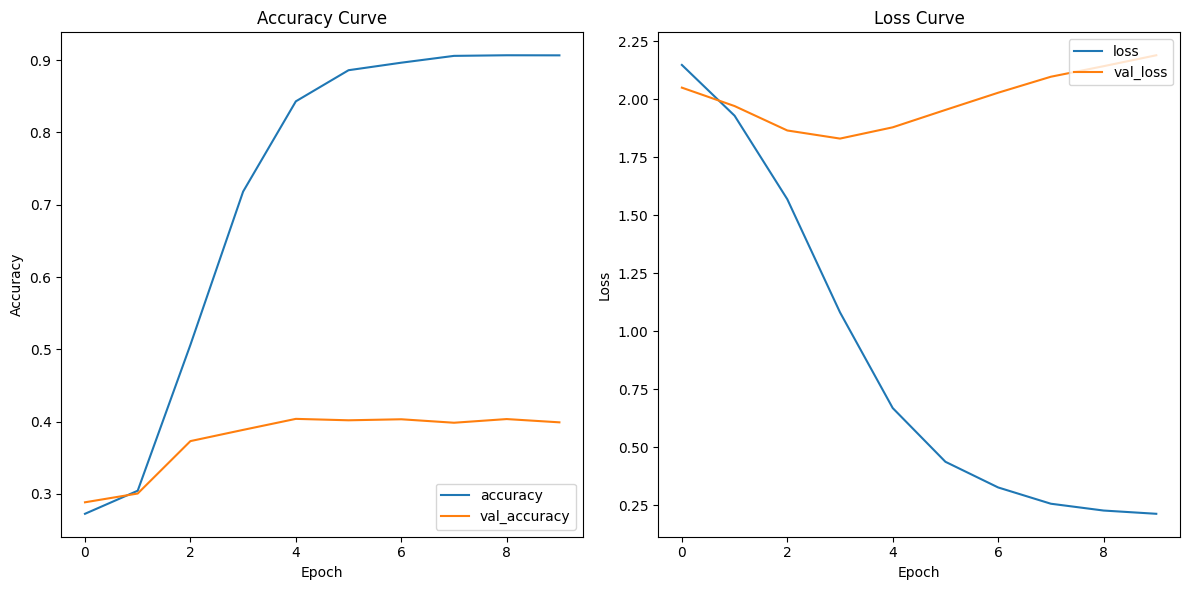

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Plot the accuracy curve on the first subplot
ax1.plot(history.history['accuracy'], label='accuracy')
ax1.plot(history.history['val_accuracy'], label='val_accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')
ax1.set_title('Accuracy Curve')

# Plot the loss curve on the second subplot
ax2.plot(history.history['loss'], label='loss')
ax2.plot(history.history['val_loss'], label='val_loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')
ax2.set_title('Loss Curve')

# Display the figure
plt.tight_layout()
plt.show()

111/111 [==============================] - 0s 3ms/step


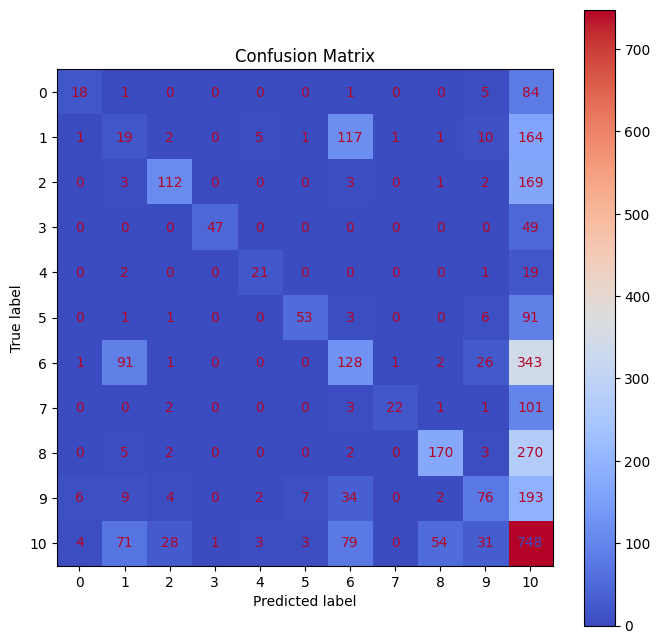

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay


y_test_pred = model.predict(test_dataset)

# Compute the confusion matrix
cm = confusion_matrix(np.argmax(y_test_encoded, axis=1), np.argmax(y_test_pred, axis=1))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(include_values=True, cmap='coolwarm', xticks_rotation='horizontal', ax=ax)
plt.title('Confusion Matrix')
plt.show()

In [22]:
from collections import Counter


spotify_data = pd.read_csv('spotify_data.csv')

user_data = spotify_data[spotify_data['user_id']==spotify_data['user_id'].values[25200]]
# Prepare the user data

# user_data = user_data.to_frame().T  # Convert user_data to a DataFrame with a single row

labels = ["Rock", "Indie", "Alt", "Pop", "Metal", "HipHop", "Alt_Music", "Blues", "Acoustic/Folk", "Instrumental", "Country"]

user_data = normalize(columns, user_data)
    
user_data = preprocessor.transform(user_data)

# Make predictions using the loaded model
user_predictions = model.predict(user_data)

# Decode the predictions to get the predicted genre
predicted_genre_index = np.argmax(user_predictions, axis=1)

predicted_genre_labels = [labels[i] for i in predicted_genre_index]

# Find the most frequent genre
most_frequent_genre = Counter(predicted_genre_labels).most_common(1)[0][0]

# Count the occurrences of each genre
genre_counts = Counter(predicted_genre_labels)

# Ensure that all labels are present in the counts, even if some have zero occurrences
df = pd.DataFrame({'Genre': labels, 'Count': [genre_counts[label] for label in labels]})

# Sort the DataFrame by count in descending order
df = df.sort_values(by='Count', ascending=False)

fig = px.bar(df, x='Genre', y='Count', color='Genre', title='User Overall Genre Preference',
            labels={'Count': 'Genre Count'})

fig.show()

print(f"Your Frequently Listened Genre: {most_frequent_genre}")


4/4 [==============================] - 0s 2ms/step


Your Frequently Listened Genre: Country
